### Mitchell

**Station Name:** 	mchl (mchl00aus)

**Location:** Walhallow, Queensland, Austalia

**Ellipsoidal Coordinates:**

- Latitude: -26.359 degrees

- Longitude: 148.145 degrees

- Height: 534.591 meters

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/MCHL.sta)

[Google Maps Link](https://www.google.com/maps/place/26%C2%B021'32.4%22S+148%C2%B008'42.0%22E/@-26.359,148.145,11z/data=!4m5!3m4!1s0x0:0x9200f9ebb23ec5b1!8m2!3d-26.359!4d148.145?hl=en) 

<p align=center>
<img src="../../../docs/_static/MCHL.jpeg" width="500">
</p>

**Archives:** CDDIS, BKG, GA
 
Read the instructions for the [soil moisture code!](https://gnssrefl.readthedocs.io/en/latest/pages/README_vwc.html)!

In [1]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg
from gnssrefl.vwc_input import vwc_input
from gnssrefl.quickPhase import quickphase
from gnssrefl.vwc import vwc

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks


#### Step 1: GNSS-IR
Begin by generating the SNR files. To be sure we can get the L2C data, we will use the RINEX 3 files.
These require the longer station name (mchl00aus) and are available at either cddis or ga.
Choose the one that is less slow for you. 
In some cases we hae found the data are at cddis but not ga or vice versa. Apparently the data are also 
available from BKG. We are not sure why this is. If you have a way to access 
these files, just download them and put them in the local
processing area and use the -nolook option). We are going to start with two years of data and 
using the default GPS orbit option and the cddis archive:

In [2]:
rinex2snr('mchl00aus', 2017, 1, doy_end=365, year_end=2018, archive='cddis')

SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0010.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0020.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0030.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0040.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0050.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0060.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0070.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0080.17.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/snr/mchl/mchl0090.17.snr66
SNR file already exists /Use

uncompress: auto3270.18n.Z: Inappropriate file type or format


SOPAC download did not work, so will try CDDIS
Try the unix compressed version
Try the gzipped version
Change the filename to what we use  auto3270.18n
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto3270.18n


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/mchl/mchl3270.18.snr66
MCHL00AUS  year: 2018  doy: 328 from:  cddis
Filename: MCHL00AUS_R_20183280000_01D_30S_MO.crx.gz
File exists:  MCHL00AUS_R_20183280000_01D_30S_MO.crx.gz  at  cddis
Requested a GPS only nav file
100% [............................................................................] 101471 / 101471found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto3280.18n


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/mchl/mchl3280.18.snr66
MCHL00AUS  year: 2018  doy: 329 from:  cddis
Filename: MCHL00AUS_R_20183290000_01D_30S_MO.crx.gz
File exist

If you have any difficult downloading these RINEX 3 files, UNAVCO has kindly downloaded and converted 
a few years of files into RINEX 2.11 that includes L2C data. Uncomment the line below if you want to use this:

In [3]:
#rinex2snr('mchl', 2017, 1, doy_end=365, archive='special')

Use the <code>quickLook</code> with the l2c frequency to give a look to the data quality.
Then set up your parameters with <code>make_gnssir_input</code>

In [5]:
make_gnssir_input('mchl', l2c=True)

Assume you want to use the UNR database.
Using standard frequency choices.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl.json


The location of the json file is printed to the screen. 
The default behavior is to accept all azimuths.
Modify the azimuths in the json if you feel that is needed.
How can you tell if you have bad azimuths? Look back at the <code>quickLook</code> results.
Do not worry excessively about this at this stage. Once you have a VWC solution you can go back and easily/quickly iterate to remove bad 
azimuths and satellite tracks.

Run the <code>gnssir</code> each day in 2017 and 2018:

In [6]:
gnssir('mchl', 2017, 1, doy_end=365, year_end=2018)

{'station': 'mchl', 'lat': -26.358904661, 'lon': 148.144960505, 'ht': 534.591379, 'minH': 0.5, 'maxH': 8.0, 'e1': 5.0, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 2.8, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [0, 360], 'freqs': [20], 'reqAmp': [5.0], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'mchl_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [20]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [0, 360]
Using azimuths:  [0, 360]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file should be stored here: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/gpt_1wA.pic

#### Step 2: Soil Moisture

Pick the satellite tracks you are going to use:


In [ ]:
vwc_input?

In [7]:
vwc_input('mchl', 2017)

Minimum number of tracks required  100
Using L2C satellite list for December 31 on  2017
>>>> Apriori RH file written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt


This creates a file that will go in $REFL_CODE/input/mchl_phaseRH.txt

This file can be hand edited if you find out later that a 
particularly satellite track is not working. To comment lines out you use %.

Run the <code>phase</code> code:

In [8]:
quickphase('mchl', 2017, 1, doy_end=365, year_end=2018)

Analyzing year/day of year 2017/1
Saving phase file to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/phase/mchl/001.txt
Using:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt
Analyzing Frequency  20  Year  2017  Day of Year  1
Analyzing year/day of year 2017/2
Saving phase file to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/phase/mchl/002.txt
Using:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt
Analyzing Frequency  20  Year  2017  Day of Year  2
Analyzing year/day of year 2017/3
Saving phase file to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/phase/mchl/003.txt
Using:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt
Analyzing Frequency  20  Year  2017  Day of Year  3
Analyzing year/day of year 2017/4
Saving phase file to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2017/phase/mchl/004.txt
Using:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/m

The location of the output files for this stage are printed to the screen.

Finally, the <code>vwc</code> module compiles all the 
data in the requested years and generates a volumetric water content file.

It also produces plots which can help you assess your results:

1. Raw phases in geographic quadrants
2. Daily phase averages
3. Modeling Results
4. Final VWC

Requested frequency:  20
Total phase measurements for this frequency:  20911
20911  number of rows
Using:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt
mchl_tmp.txt /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/mchl_phaseRH.txt
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.
No average , so no QC. You should iterate.

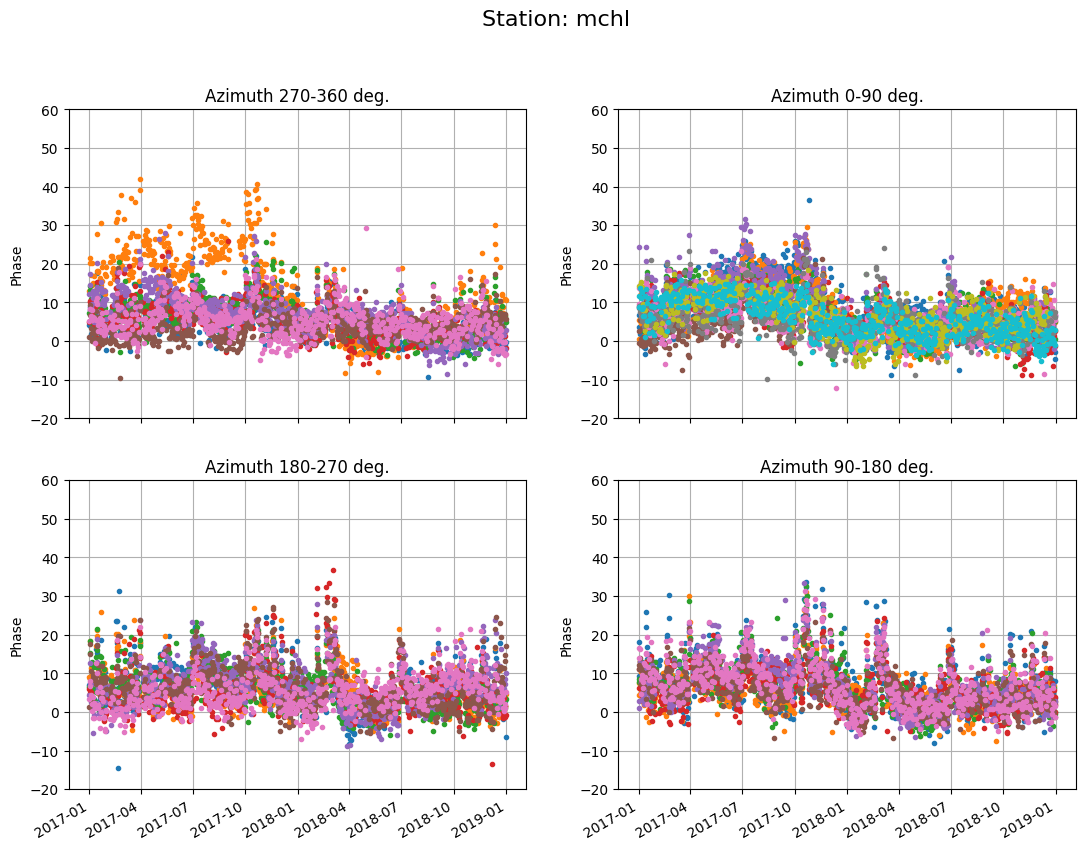

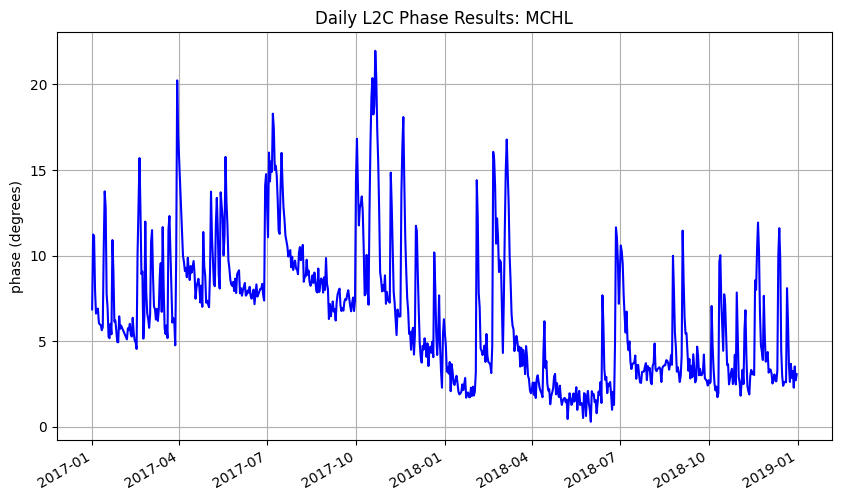

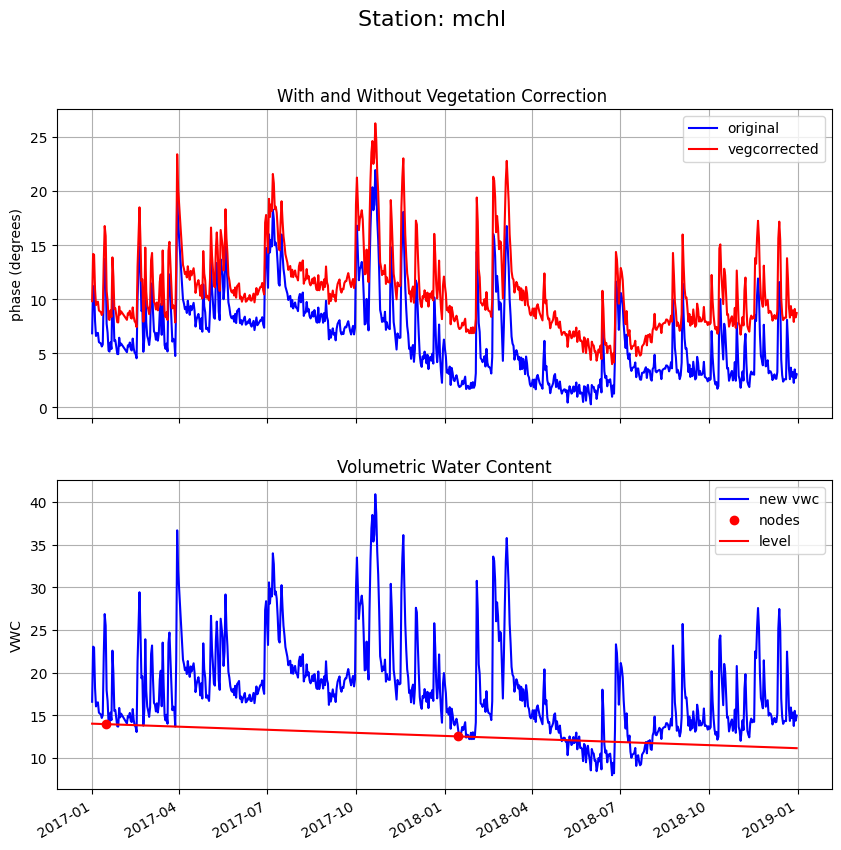

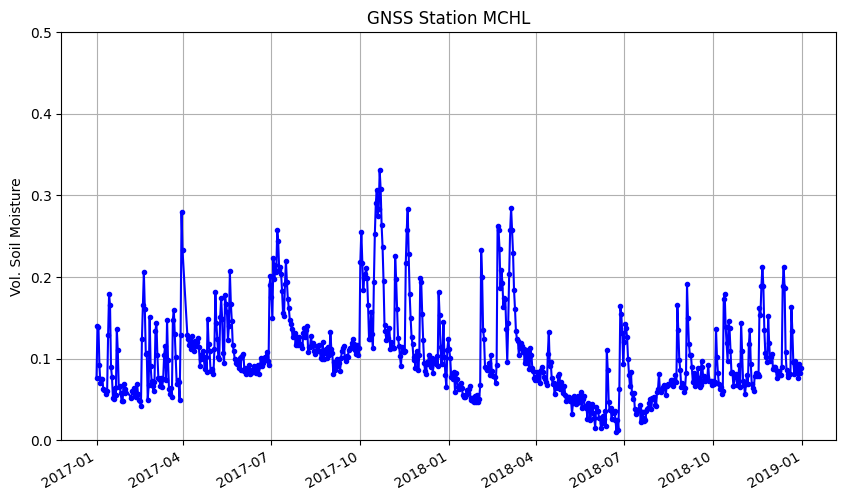

>>> VWC results being written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/mchl/mchl_vwc.txt


In [9]:
vwc('mchl',  2017, year_end=2018)

A big thank you to Lucas Holden for test driving this use case.